In [1]:
# Class IT-533 Week #9  - Clustering with kMeans, Hierarchical Clustering, DBScan
# Summer 2020
# Week #9  Practice Code
# By Wei Geng(David)
# Created on: 07/112/2020

In [2]:
# Convert to pandas DataFrame
%pip install pandas
%pip install matplotlib
%pip install sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.precision',2)
df = pd.read_csv('https://raw.githubusercontent.com/intelspeedstep/AMOD533/master/UCI_Credit_Card.csv')
print(df.info(verbose=True))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### -------------------------------------------Question 1 Set up an elbow analysis to determine the optimal number of clusters to look for in a kMeans analysis -----------------------------------------

In [3]:
# Let's remove all the columns that were listed in the instruction.
# check the dataset to make sure those columns are removed correctly.
removed_columns=['ID','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month']
df.drop(removed_columns,axis=1,inplace=True)
print("DataFrame size: ", df.shape)
df.head()

DataFrame size:  (30000, 10)


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,24,2,2,-1,-1,-2,-2
1,2,2,2,26,-1,2,0,0,0,2
2,2,2,2,34,0,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0


In [4]:
# fit the model with K from range 1 to 10, then output the inertia
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

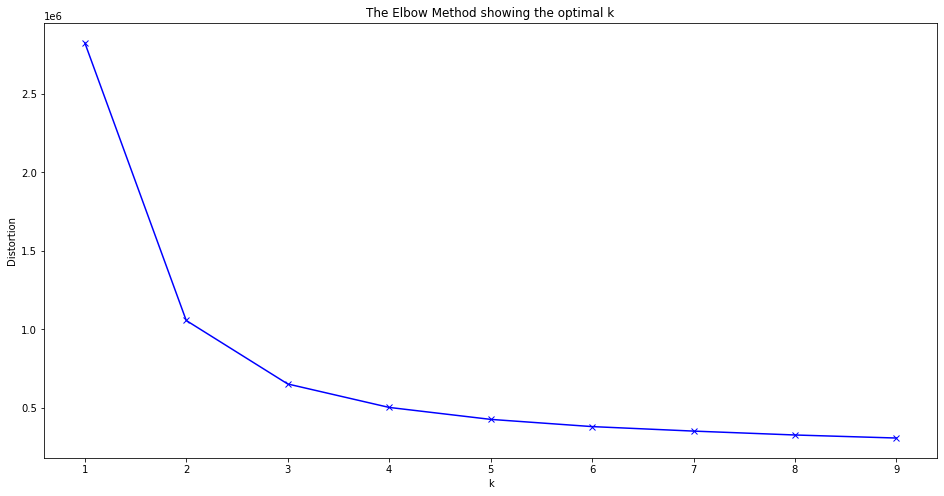

In [5]:
# plot the distortions vs K-value.
# from the graph, we see the elbow point is at k=3
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

### -------------------------------------Question 2 Perform a kMeans analysis. --------------------------

In [6]:
# fit a k means models with k=3 and output the centriods for the 3 clusters
# however, we can not visualize the clusters since we have more than 3 dimensions in the dataset.
kmeanModel = KMeans(n_clusters=3).fit(df)
centroids = kmeanModel.cluster_centers_
print(centroids)

[[ 1.64123049e+00  1.73642948e+00  1.79698350e+00  2.74149182e+01
   5.01007989e-02 -4.87568133e-02 -7.86978272e-02 -1.36787874e-01
  -1.78451430e-01 -2.10781752e-01]
 [ 1.54105184e+00  2.14737041e+00  1.27960651e+00  5.07483920e+01
  -1.30533485e-02 -1.33749527e-01 -1.68936814e-01 -2.20393492e-01
  -2.79795687e-01 -3.07226636e-01]
 [ 1.58864058e+00  1.85381150e+00  1.38901157e+00  3.79066337e+01
  -9.74295557e-02 -2.34343256e-01 -2.68439184e-01 -3.20024733e-01
  -3.63660454e-01 -3.78588464e-01]]


In [7]:
# output the K-means model labels as we see, 0,1, and 2.
import numpy as np
print(np.unique(kmeanModel.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([13392,  5286, 11322]))


In [8]:
# I output the label of each data point
kmeans_3=pd.DataFrame(kmeanModel.labels_,columns=['cluster'])
print(kmeans_3.cluster.value_counts())
kmeans_3.head(10)

0    13392
2    11322
1     5286
Name: cluster, dtype: int64


,cluster
0,0
1,0
2,2
3,2
4,1
5,2
6,0
7,0
8,0
9,2


### -------------------------------------Question 3 Perform a DBScan analysis. --------------------------

In [9]:
# fit the DBScan model with eps = 0.05 and make the min sample size =120
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.05, min_samples=120)
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=120, n_jobs=None, p=None)

In [10]:
# output the DBScan model labels as we see, there are 7 labels.
import numpy as np
print(np.unique(dbscan.labels_,return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5]), array([29230,   123,   134,   132,   126,   127,   128]))


In [11]:
# I output the label of each data point
# -1 means there is no clusters that the algorithm can find.
dbscan_df=pd.DataFrame(dbscan.labels_,columns=['cluster'])
print(dbscan_df.cluster.value_counts())
dbscan_df.head(10)

-1    29230
 1      134
 2      132
 5      128
 4      127
 3      126
 0      123
Name: cluster, dtype: int64


,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


### -----------------------------------------END--------------------------------------------------------------